In [ ]:
import pandas as pd
#loading dataset
df = pd.read_csv('/content/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#checking null values
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
# Define target and features
X = df.drop('target', axis=1)  # All columns except 'target'
y = df['target']               # The column we want to predict

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np

def plot_learning_curve(model, X, y, title, scaled=False):
    if scaled:
        train_sizes, train_scores, val_scores = learning_curve(
            model, X_train_scaled, y_train,
            cv=5, scoring='accuracy',
            train_sizes=np.linspace(0.1, 1.0, 10),
            random_state=42, n_jobs=-1
        )
    else:
        train_sizes, train_scores, val_scores = learning_curve(
            model, X_train, y_train,
            cv=5, scoring='accuracy',
            train_sizes=np.linspace(0.1, 1.0, 10),
            random_state=42, n_jobs=-1
        )

    train_mean = np.mean(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)

    plt.plot(train_sizes, train_mean, label='Training Accuracy')
    plt.plot(train_sizes, val_mean, label='Validation Accuracy')
    plt.title(title)
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
# LOGISTIC REGRESSION MODEL

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = LogisticRegression(max_iter=1000)  # increase max_iter if convergence warning
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_test_scaled)

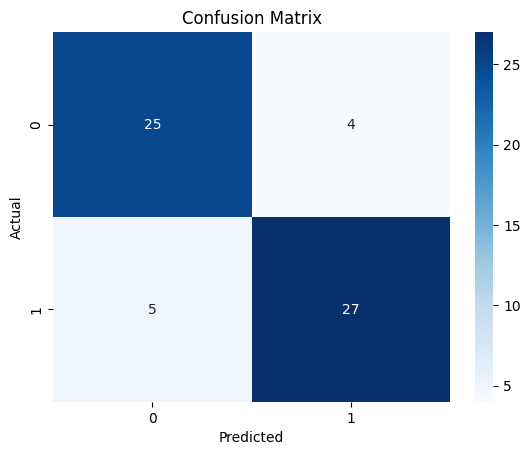

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Calculate and store metrics with specific variable names
logistic_regression_accuracy = accuracy_score(y_test, y_pred)
logistic_regression_precision = precision_score(y_test, y_pred)
logistic_regression_recall = recall_score(y_test, y_pred)
logistic_regression_f1 = f1_score(y_test, y_pred)

# Print the stored values
print("Logistic Regression Accuracy:", logistic_regression_accuracy)
print("Logistic Regression Precision:", logistic_regression_precision)
print("Logistic Regression Recall:", logistic_regression_recall)
print("Logistic Regression F1 Score:", logistic_regression_f1)

Logistic Regression Accuracy: 0.8524590163934426
Logistic Regression Precision: 0.8709677419354839
Logistic Regression Recall: 0.84375
Logistic Regression F1 Score: 0.8571428571428571


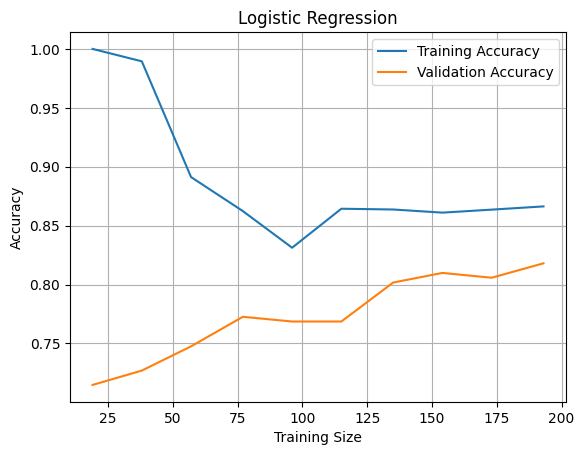

In [ ]:
plot_learning_curve(model_lr, X_train, y_train, "Logistic Regression", scaled=True)

In [ ]:
# DESCISION TREE CLASSIFIER MODEL

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Initialize and train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred_dt = dt_model.predict(X_test)

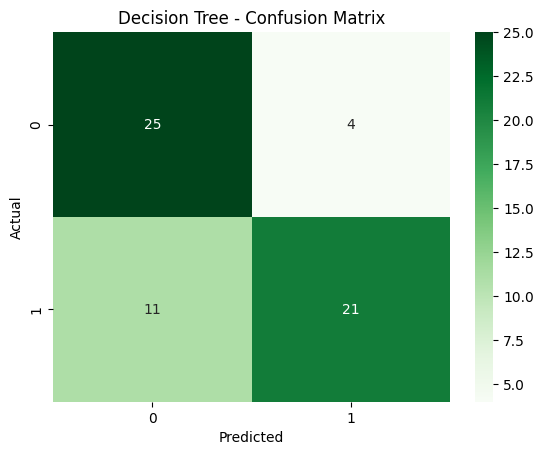

In [ ]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree - Confusion Matrix')
plt.show()

In [ ]:
# Save metrics in specifically named variables
decision_tree_accuracy = accuracy_score(y_test, y_pred_dt)
decision_tree_precision = precision_score(y_test, y_pred_dt)
decision_tree_recall = recall_score(y_test, y_pred_dt)
decision_tree_f1 = f1_score(y_test, y_pred_dt)

# Print metrics
print("Decision Tree Accuracy:", decision_tree_accuracy)
print("Decision Tree Precision:", decision_tree_precision)
print("Decision Tree Recall:", decision_tree_recall)
print("Decision Tree F1 Score:", decision_tree_f1)

Decision Tree Accuracy: 0.7540983606557377
Decision Tree Precision: 0.84
Decision Tree Recall: 0.65625
Decision Tree F1 Score: 0.7368421052631579


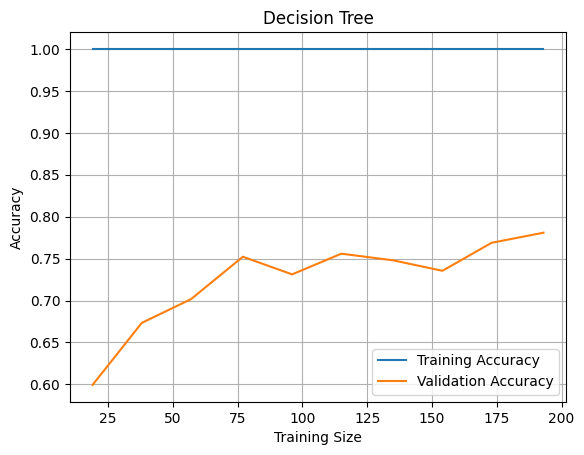

In [ ]:
plot_learning_curve(DecisionTreeClassifier(), X_train, y_train, "Decision Tree")

In [ ]:
# RANDOM FOREST MODEL

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Initialize and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(X_test)

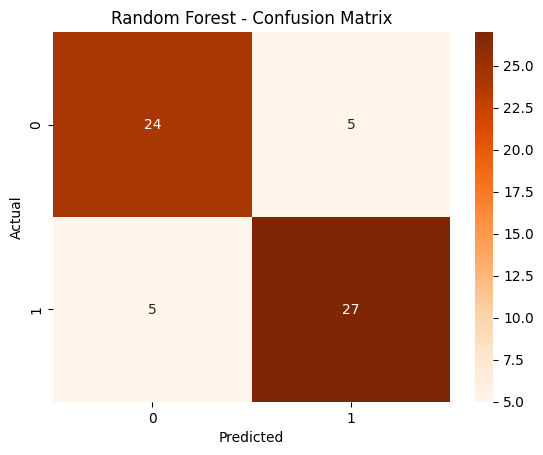

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest - Confusion Matrix')
plt.show()

In [ ]:
# Save metrics with random forest-specific variable names
random_forest_accuracy = accuracy_score(y_test, y_pred_rf)
random_forest_precision = precision_score(y_test, y_pred_rf)
random_forest_recall = recall_score(y_test, y_pred_rf)
random_forest_f1 = f1_score(y_test, y_pred_rf)

# Print metrics
print("Random Forest Accuracy:", random_forest_accuracy)
print("Random Forest Precision:", random_forest_precision)
print("Random Forest Recall:", random_forest_recall)
print("Random Forest F1 Score:", random_forest_f1)

Random Forest Accuracy: 0.8360655737704918
Random Forest Precision: 0.84375
Random Forest Recall: 0.84375
Random Forest F1 Score: 0.84375


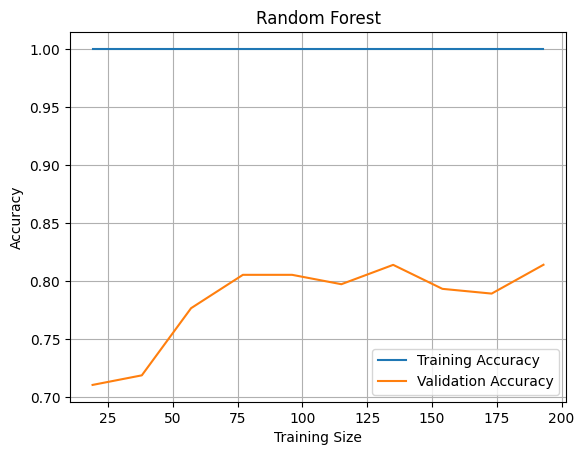

In [ ]:
plot_learning_curve(RandomForestClassifier(), X_train, y_train, "Random Forest")

In [ ]:
# SUPPORT VECTOR MACHINE MODEL

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize and train the SVM model
svm_model = SVC(kernel='rbf', random_state=42)  # You can try 'linear' or 'poly' as well
svm_model.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [ ]:
y_pred_svm = svm_model.predict(X_test_scaled)

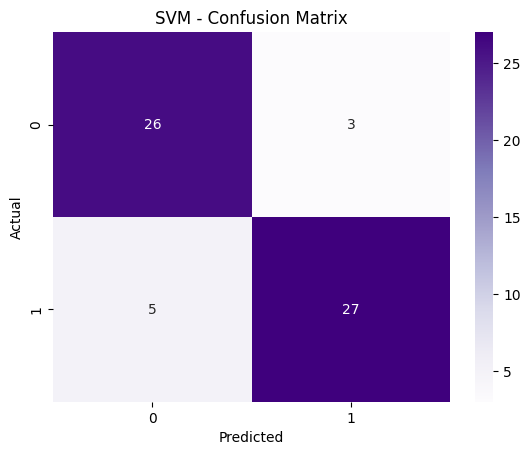

In [ ]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM - Confusion Matrix')
plt.show()

In [ ]:
# Save metrics in SVM-prefixed variables
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)

# Print metrics
print("SVM Accuracy:", svm_accuracy)
print("SVM Precision:", svm_precision)
print("SVM Recall:", svm_recall)
print("SVM F1 Score:", svm_f1)

SVM Accuracy: 0.8688524590163934
SVM Precision: 0.9
SVM Recall: 0.84375
SVM F1 Score: 0.8709677419354839


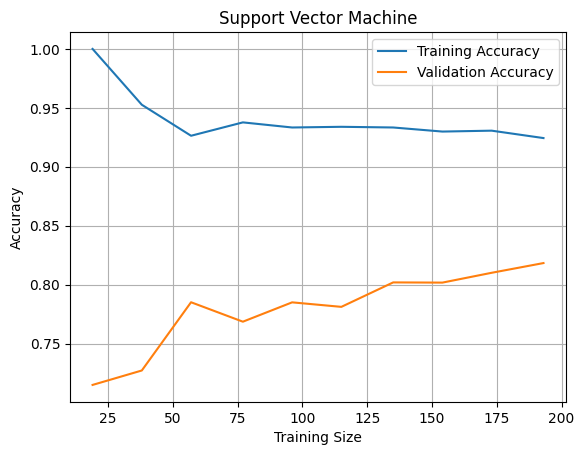

In [ ]:
plot_learning_curve(SVC(), X_train, y_train, "Support Vector Machine", scaled=True)

In [ ]:
# K-NEAREST NEIGHBOUR MODEL

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize and train KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can tune n_neighbors later
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn = knn_model.predict(X_test_scaled)

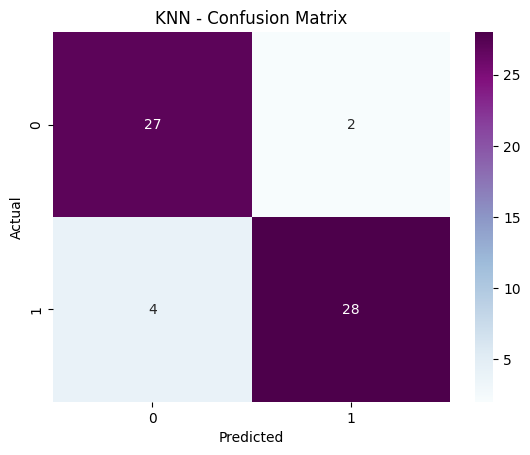

In [ ]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='BuPu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN - Confusion Matrix')
plt.show()

In [ ]:
# Save metrics in knn-prefixed variables
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn)
knn_recall = recall_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn)

# Print metrics
print("KNN Accuracy:", knn_accuracy)
print("KNN Precision:", knn_precision)
print("KNN Recall:", knn_recall)
print("KNN F1 Score:", knn_f1)

KNN Accuracy: 0.9016393442622951
KNN Precision: 0.9333333333333333
KNN Recall: 0.875
KNN F1 Score: 0.9032258064516129


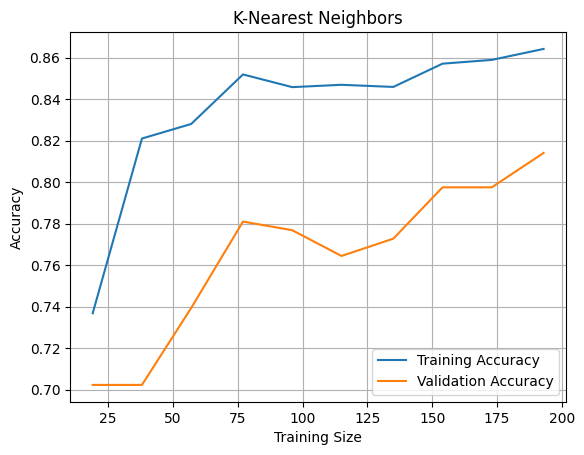

In [ ]:
plot_learning_curve(KNeighborsClassifier(), X_train, y_train, "K-Nearest Neighbors", scaled=True)

In [ ]:
# XGBOOST CLASSIFIER MODEL

In [ ]:
pip install xgboost

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:47:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=False)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:14:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)

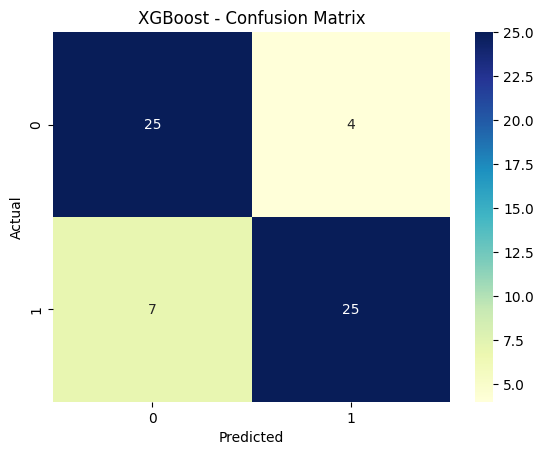

In [ ]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost - Confusion Matrix')
plt.show()

In [ ]:
# Save metrics in xgboost-prefixed variables
xgboost_accuracy = accuracy_score(y_test, y_pred_xgb)
xgboost_precision = precision_score(y_test, y_pred_xgb)
xgboost_recall = recall_score(y_test, y_pred_xgb)
xgboost_f1 = f1_score(y_test, y_pred_xgb)

# Print metrics
print("XGBoost Accuracy:", xgboost_accuracy)
print("XGBoost Precision:", xgboost_precision)
print("XGBoost Recall:", xgboost_recall)
print("XGBoost F1 Score:", xgboost_f1)

XGBoost Accuracy: 0.819672131147541
XGBoost Precision: 0.8620689655172413
XGBoost Recall: 0.78125
XGBoost F1 Score: 0.819672131147541


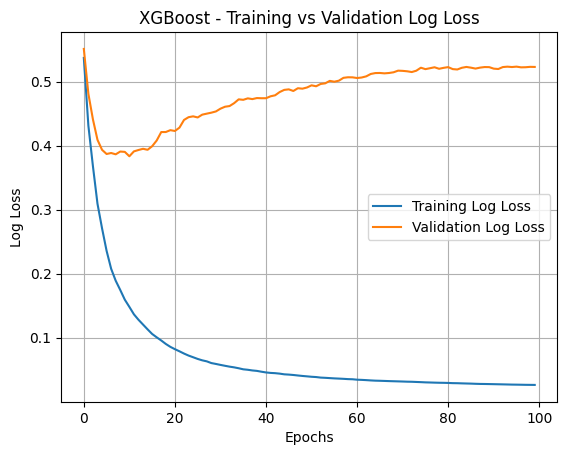

In [ ]:
results = xgb_model.evals_result()

plt.plot(results['validation_0']['logloss'], label='Training Log Loss')
plt.plot(results['validation_1']['logloss'], label='Validation Log Loss')
plt.title('XGBoost - Training vs Validation Log Loss')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# NEURAL NETWORKS MODEL-(WITH KERAS)

In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
nn_model = Sequential()
nn_model.add(Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)))
nn_model.add(Dense(8, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))  # Binary output

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
nn_model.fit(X_train_scaled, y_train, epochs=100, batch_size=16, verbose=0)

In [ ]:
# Predict probabilities
y_pred_probs = nn_model.predict(X_test_scaled)

# Convert probabilities to binary labels
y_pred_nn = (y_pred_probs > 0.5).astype(int).reshape(-1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


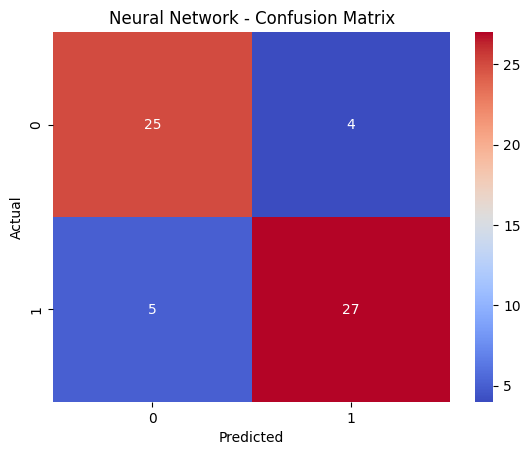

In [ ]:
cm_nn = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Neural Network - Confusion Matrix')
plt.show()

In [ ]:
history = nn_model.fit(X_train_scaled, y_train,
                       epochs=50,
                       validation_data=(X_test_scaled, y_test),
                       batch_size=32)


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.9469 - loss: 0.1835 - val_accuracy: 0.8525 - val_loss: 0.4994
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9228 - loss: 0.1934 - val_accuracy: 0.8525 - val_loss: 0.4990
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9385 - loss: 0.1757 - val_accuracy: 0.8525 - val_loss: 0.4990
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9329 - loss: 0.1917 - val_accuracy: 0.8525 - val_loss: 0.4994
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9371 - loss: 0.1822 - val_accuracy: 0.8525 - val_loss: 0.4987
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9315 - loss: 0.1846 - val_accuracy: 0.8525 - val_loss: 0.4988
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9470 - loss: 0.1855 - val_accuracy: 0.8525 - val_loss: 0.5006
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9237 - loss: 0.2005 - val_accuracy: 0.8525 - val_loss: 0.5010

In [ ]:
# Save metrics with nn_ prefix
nn_accuracy = accuracy_score(y_test, y_pred_nn)
nn_precision = precision_score(y_test, y_pred_nn)
nn_recall = recall_score(y_test, y_pred_nn)
nn_f1 = f1_score(y_test, y_pred_nn)

# Print metrics
print("NN Accuracy:", nn_accuracy)
print("NN Precision:", nn_precision)
print("NN Recall:", nn_recall)
print("NN F1 Score:", nn_f1)

NN Accuracy: 0.8524590163934426
NN Precision: 0.8709677419354839
NN Recall: 0.84375
NN F1 Score: 0.8571428571428571


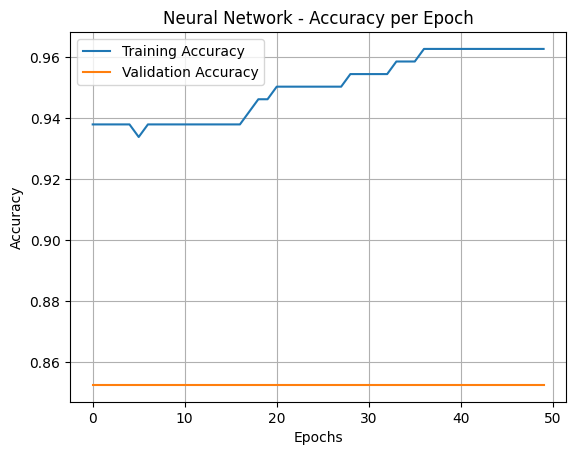

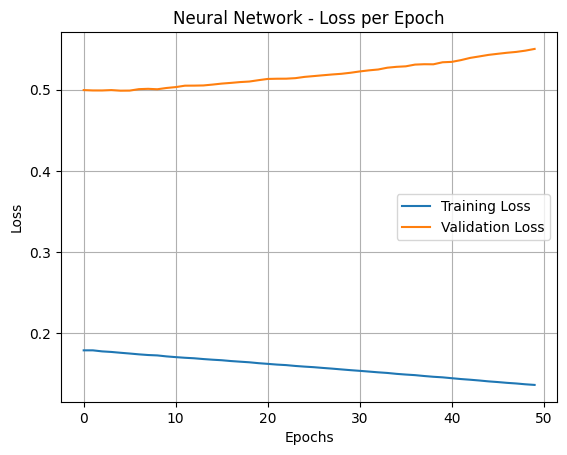

In [ ]:
# Accuracy per epoch
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Neural Network - Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss per epoch
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Neural Network - Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# All The Values Of Precision, Recall, F1-Score and Accuracy in a single table for all the Models

In [ ]:
metrics = {
    'Logistic Regression': [
        logistic_regression_accuracy,
        logistic_regression_precision,
        logistic_regression_recall,
        logistic_regression_f1
    ],
    'Decision Tree': [
        decision_tree_accuracy,
        decision_tree_precision,
        decision_tree_recall,
        decision_tree_f1
    ],
    'Random Forest': [
        random_forest_accuracy,
        random_forest_precision,
        random_forest_recall,
        random_forest_f1
    ],
    'SVM': [
        svm_accuracy,
        svm_precision,
        svm_recall,
        svm_f1
    ],
    'KNN': [
        knn_accuracy,
        knn_precision,
        knn_recall,
        knn_f1
    ],
    'XGBoost': [
        xgboost_accuracy,
        xgboost_precision,
        xgboost_recall,
        xgboost_f1
    ],
    'Neural Network': [
        nn_accuracy,
        nn_precision,
        nn_recall,
        nn_f1
    ]
}

# Create DataFrame
import pandas as pd

metrics_df = pd.DataFrame.from_dict(metrics, orient='index',
                                    columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Display the table
print(metrics_df)


                     Accuracy  Precision   Recall  F1 Score
Logistic Regression  0.852459   0.870968  0.84375  0.857143
Decision Tree        0.754098   0.840000  0.65625  0.736842
Random Forest        0.836066   0.843750  0.84375  0.843750
SVM                  0.868852   0.900000  0.84375  0.870968
KNN                  0.901639   0.933333  0.87500  0.903226
XGBoost              0.819672   0.862069  0.78125  0.819672
Neural Network       0.852459   0.870968  0.84375  0.857143
